## **Network Visualization in Python ~ part 1**

This notebook was prepared by **Yessica Herrera-Guzmán** for the Network Science course at [Universidad del Desarrollo](https://www.udd.cl).

### **Introduction**

The goals of these notebooks are:

1. Learn to visualize a network with node attributes in NetworkX.
2. Explore the network visualization of edge attributes. 
3. Visualize network connectivity.
  
Different layouts will be explored, including Spring, Force Atlas 2, and Hierarchical Edge Bundling (HEB), to visually capture the relationships and connectivity patterns of a network in various ways.

Students would be able to produce multiple visualizations from the same network to highlight structural properties, from which they may propose research questions related to network topology based on node and edge attributes. 

**Case study**

Ballet exhibits significant gender imbalances in choreographic works and leading company positions.

This notebook implements different visualization tools to help highlight the structural gender imbalances in creative company collaborations.

Data collected from the **[New York City Ballet](https://www.nycballet.com)**.

![Alt text](NYCBgender.png)

Full structured data can be accessed here: https://doi.org/10.5281/zenodo.8374171

Related publication: Herrera-Guzmán, Y., Lee, E. & Kim, H. Structural gender imbalances in ballet collaboration networks. EPJ Data Sci. 12, 53 (2023). https://doi.org/10.1140/epjds/s13688-023-00428-z

## **Part 1: Visualize a network with node attributes in NetworkX**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import math
import csv
import community
import seaborn as sns
sns.set(context='notebook', style='ticks', font='Fira Sans', palette='husl', font_scale=1.2)

In [2]:
# Load nodelist
node_names = pd.read_csv('NYCBnodelist.csv') 

In [3]:
node_names.head(1)

,value,artist_type,gender
0,John Taras,Design,male


In [4]:
# Get a tuple with node names and their attributes
node_names['nodes'] = node_names[['value','artist_type', 'gender']].apply(tuple, axis=1)

In [5]:
node_tolist = node_names['nodes'].tolist()

In [6]:
# Creates nodelist
node_code = [n[0] for n in node_tolist]

In [7]:
# Load edgelist
edge_names = pd.read_csv('NYCBedgelist.csv') 

In [8]:
edge_names.head(1)

,source,target,type
0,Aaron Copland,April Gornik,1


In [9]:
# Get a tuple with node pairs (edges) from df
edge_names['edg'] = edge_names[['source', 'target']].apply(tuple, axis=1)

In [10]:
# Creates edgelist from tuple
edg = edge_names['edg'].tolist()

**Network**

In [11]:
g = nx.Graph()

In [12]:
g.add_nodes_from(node_code)

In [13]:
g.add_edges_from(edg)

In [14]:
# Create dictionaire of node attribute: artist_type
artist_dict = {}

for node in node_tolist: 
    artist_dict[node[0]] = node[1]

In [15]:
nx.set_node_attributes(g, artist_dict, 'artist_type')

In [16]:
# Create dictionaire of node attribute: artist_type
gender_dict = {}

for node in node_tolist: 
    gender_dict[node[0]] = node[2]

In [17]:
nx.set_node_attributes(g, gender_dict, 'gender')

In [18]:
# Remove self-loops
g.remove_edges_from(nx.selfloop_edges(g))

In [19]:
print(nx.info(g))

Graph with 549 nodes and 2202 edges


In [27]:
layout = nx.spring_layout(g, k=0.1, iterations=50)

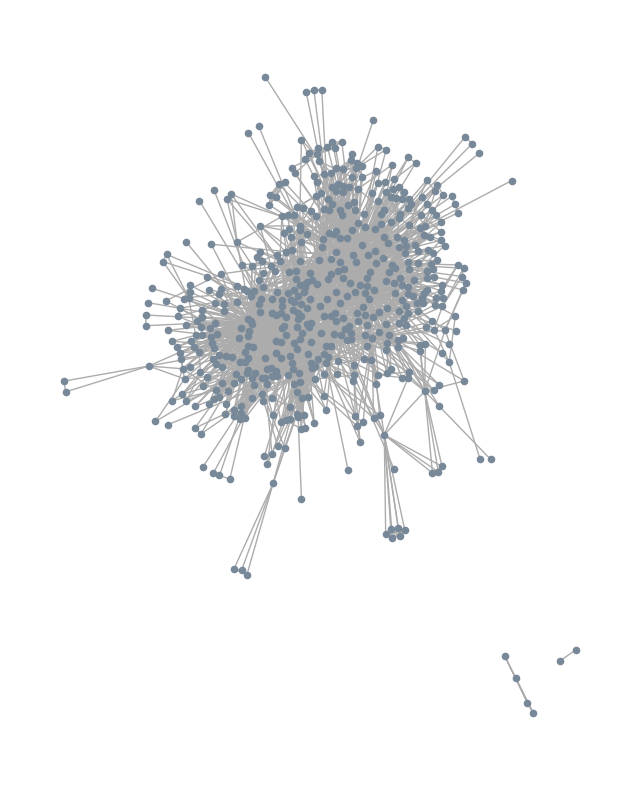

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

nx.draw_networkx(g, ax=ax, pos=layout, node_color='#778899',
                 edge_color='#abacab', with_labels=False, node_size=20)

ax.set_axis_off()

Quick excercise:

1. Is the network connected? Is it weighted?
2. Compute basic descriptive metrics to learn about the network topology.
3. What can you change of the visualization with the *k* parameter of Spring layout?

**Network visualization of by artist type**

In [24]:
node_artist = []

# for each node in the graph
for node in g.nodes(data=True):
    
    if 'Choreography' in node[1]['artist_type']:
        node_artist.append('#E11ECB') 

    elif 'Costumes' in node[1]['artist_type']:
        node_artist.append('#7D38C7') 
        
    elif 'Design' in node[1]['artist_type']:
        node_artist.append('#EF6A32') 

    elif 'Lights' in node[1]['artist_type']:
        node_artist.append('#CBE11E') 
        
    elif 'Music' in node[1]['artist_type']:
        node_artist.append('#1ECBE1') 

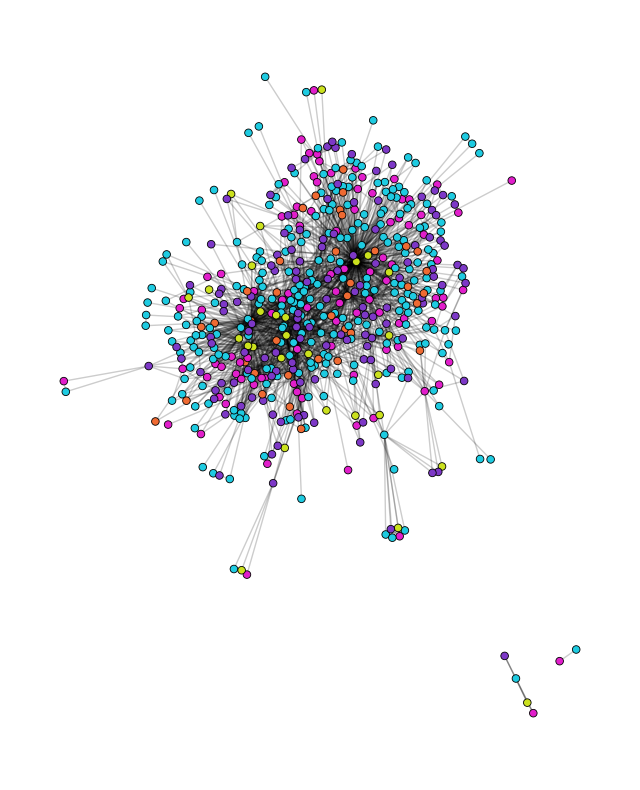

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

# draw graph with node attribute color
nx.draw_networkx_nodes(g, layout, 
                       edgecolors='black', 
                       linewidths=0.6, 
                       node_size=30, 
                       node_color=node_artist)
nx.draw_networkx_edges(g, layout, alpha=0.2)

plt.axis('off')
plt.show()

Quick excercise:

1. Is this network visualization informative about the role of artist type for the network topology? Explain your answer.

**Network visualization of by gender**

In [30]:
node_color = []

for node in g.nodes(data=True):

    if 'female' in node[1]['gender']:
        node_color.append('#e377c2') #pink

    elif 'male' in node[1]['gender']:
        node_color.append('#17becf') #blue
        
    elif 'various' in node[1]['gender']:
        node_color.append('#bcbd22') #yellow
        
    elif 'unknown' in node[1]['gender']:
        node_color.append('#7f7f7f') #gray

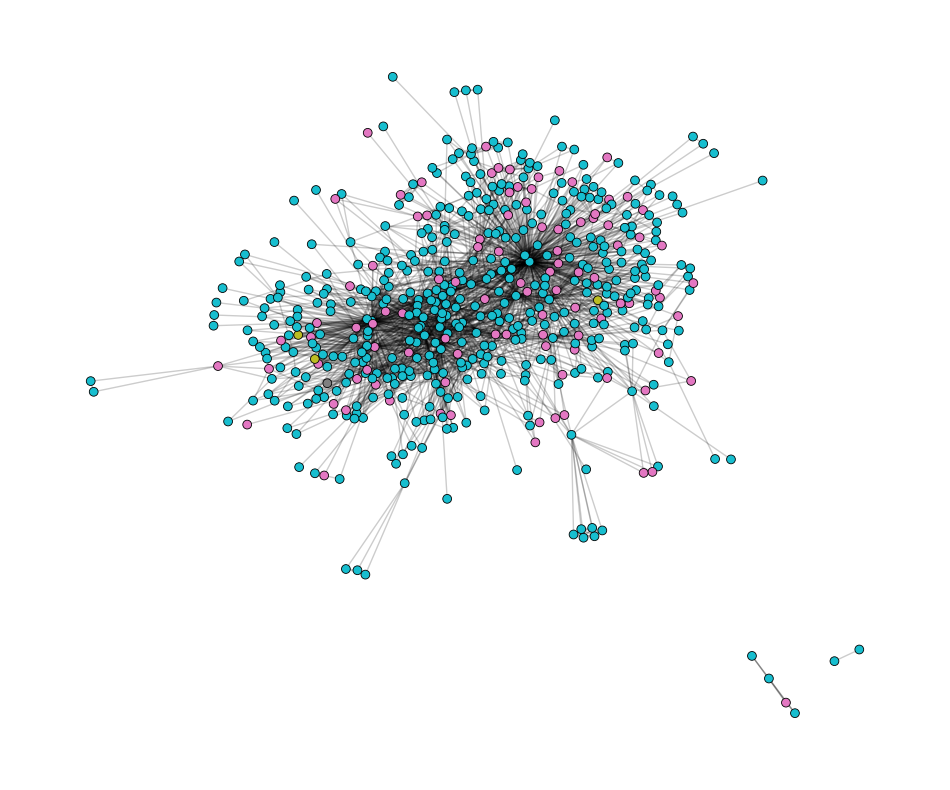

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# draw graph with node attribute color
nx.draw_networkx_nodes(g, layout, 
                       edgecolors='black', 
                       linewidths=0.6, 
                       node_size=40, 
                       node_color=node_color)
nx.draw_networkx_edges(g, layout, alpha=0.2)

plt.axis('off')
plt.show()

Quick excercise:

1. Compute degree, betweenness, and eigenvector centrality. Plot the distribution of centralities, also plot centralities by artist type and gender. 
2. Are there centrality patterns? If so, what do you think is the meaning of these patterns for a collaborative context. Explain.